# Лабарторная работа 4
## Корязин Егор 20-ИВТ-3
## Вариант 29

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [2]:
energy_df = pd.read_csv('energydata_complete.csv')
energy_df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


## 1 Задание. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных

#### date - дата в формате год-месяц-день час:минута:секунда
#### Appliances - потребление энергии электроприборами
#### light - потребление энергии световыми приборами
#### Ti - температура в i-ой комнате (градусы)
#### RH_i - влажность в i-ой комнате в процентах
#### i-ая комната: 1 - кухня  2 - гостиная 3 - прачечная 4 - офис 5 - ванная 6 - северная сторона здания 7 - гладильня 8 - детская 9 - родительская комната
#### T_out - температура снаружи 
#### Press_mm_hg - давление снаружи (миллиметры ртутного столба)
#### RH_out - влажность снаружи в процентах
#### Windspeed - скорость ветра (метры в секунды)
#### Visibility - видимость (киллометры)
#### Tdewpoint - температура точки росы (градусы)
#### rv1 & rv2 - случайные переменные

## 2 Задание. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции

In [3]:
print("Размер набора ДО удаление дубликатов:", len(energy_df))

energy_df.drop_duplicates(keep="first", inplace=True)
energy_df = energy_df.dropna().reset_index(drop=True)

print("Размер набора ПОСЛЕ удаление дубликатов:", len(energy_df))

Размер набора ДО удаление дубликатов: 19735
Размер набора ПОСЛЕ удаление дубликатов: 19735


In [4]:
print("Дупликатов нет")

Дупликатов нет


## 3 Задание. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. 

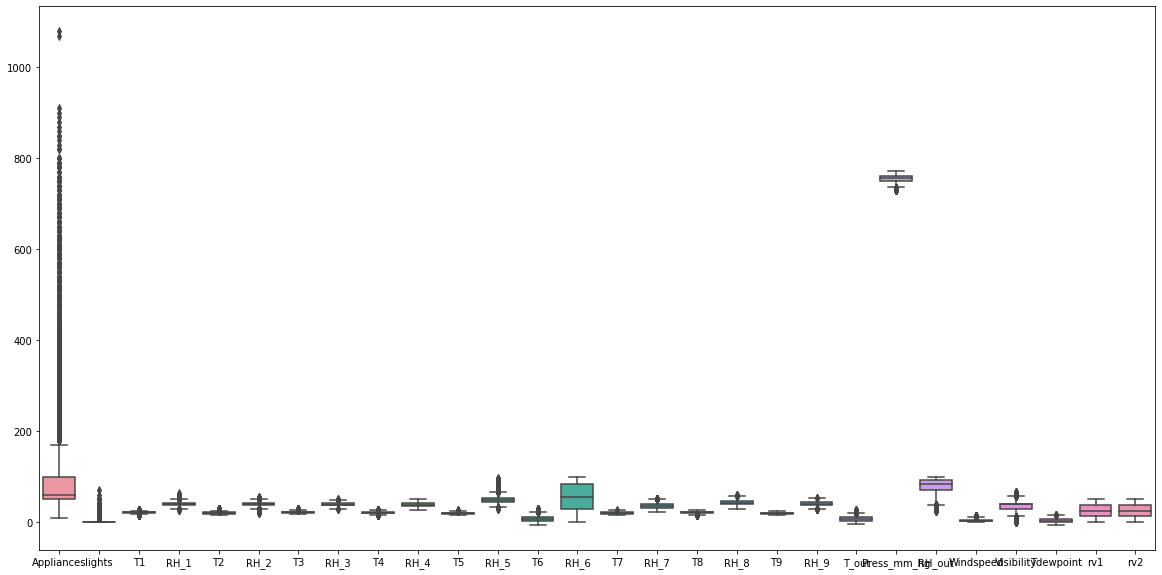

In [5]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=energy_df)
plt.show()

In [6]:
times = []

for i in range(len(energy_df)):
    clock = energy_df["date"].iloc[i][11:19]
    
    time = int(clock[0:2]) * 60 * 60 + int(clock[3:5]) * 60
    
    times.append(time)
    

In [7]:
energy_df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


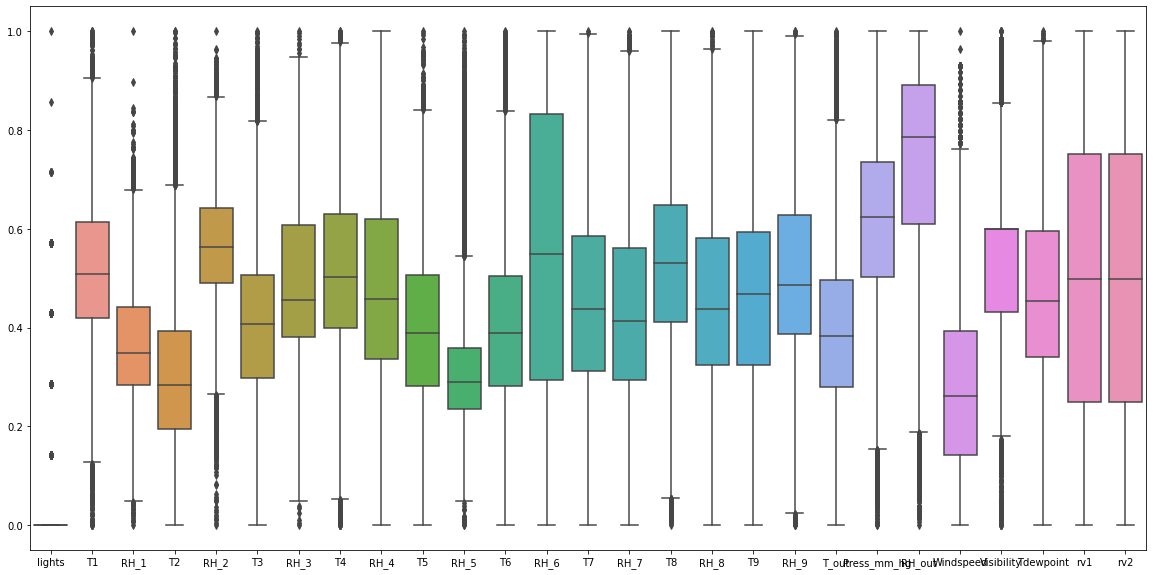

In [8]:
# Выделяем столбцы, где только числа
scaling_columns = []

for i in energy_df.columns:
    if energy_df[i].dtype.name != "object" and i != "Appliances":
        scaling_columns.append(i)
        
# В этих столбцах производим масштабирование
scaler = MinMaxScaler()
energy_df[scaling_columns] = scaler.fit_transform(energy_df[scaling_columns])

# Выводим диаграмму
plt.figure(figsize=(20, 10))
sns.boxplot(data=energy_df.drop(['Appliances'], axis = 1))
plt.show()

## 4 Задание. Выполните замену категориальных признаков; выберите и обоснуйте способ замены

#### Нет категориальных признаков

## 5 Задание. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других

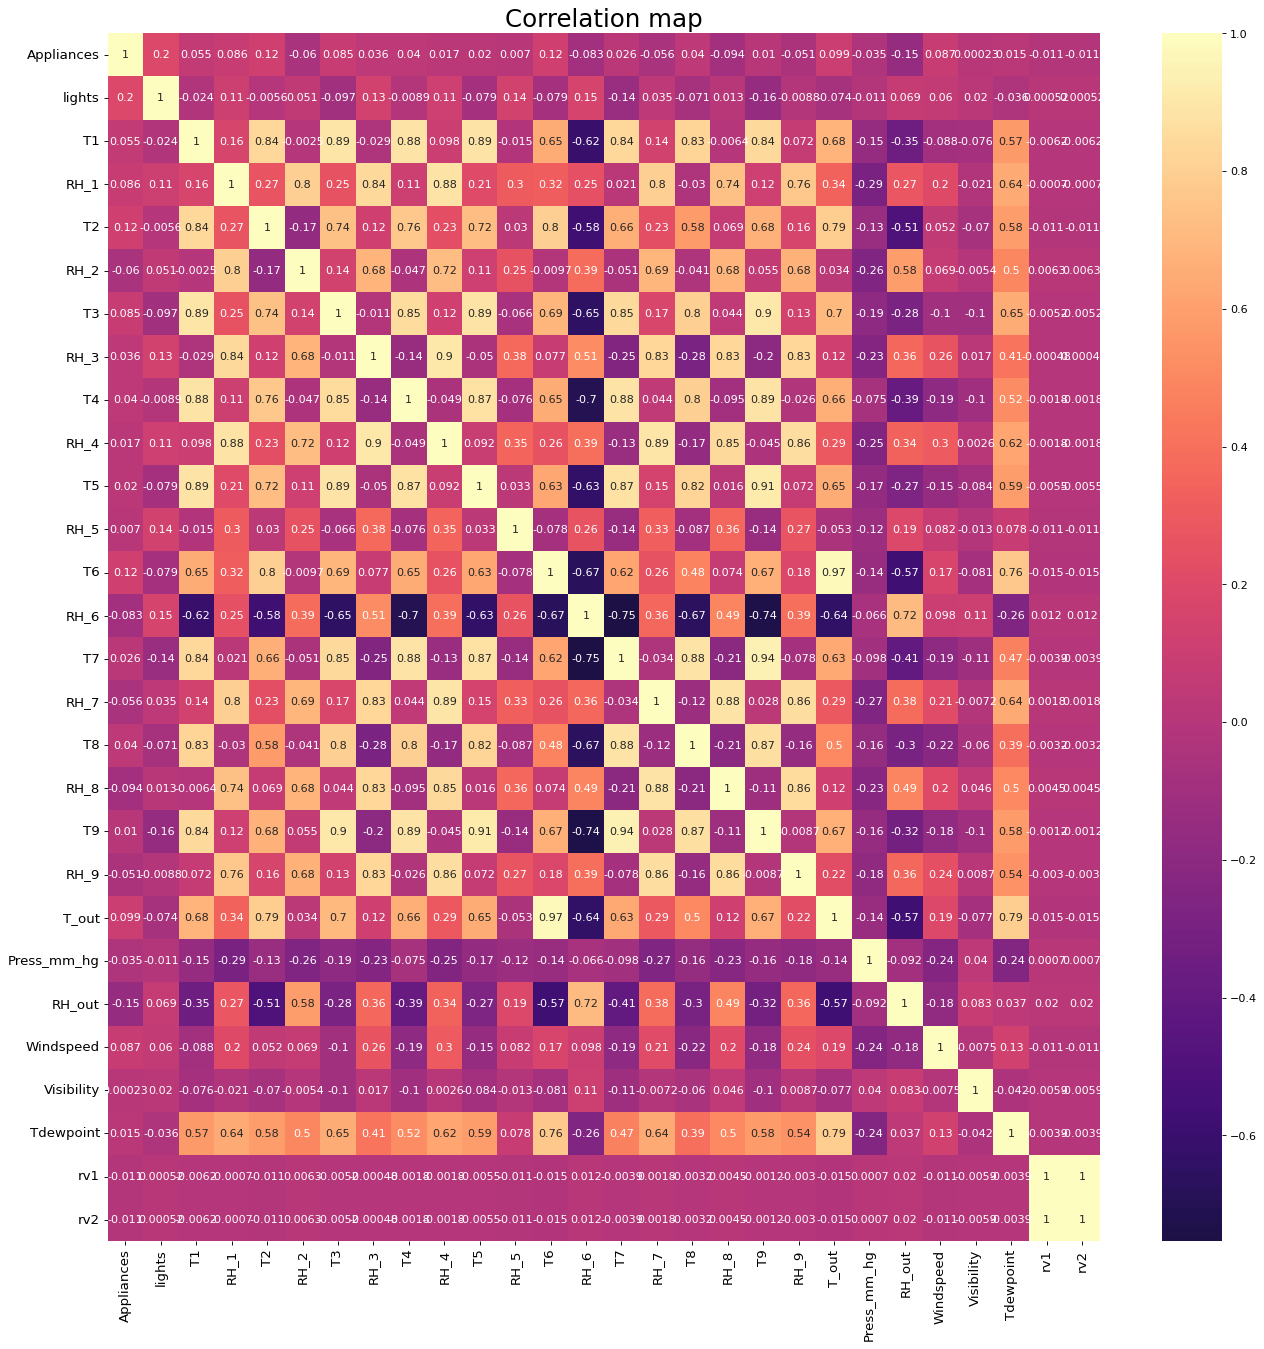

In [9]:
plt.figure(figsize=(20,20), dpi= 80)
sns.heatmap(energy_df.corr(), xticklabels=energy_df.corr().columns, yticklabels=energy_df.corr().columns, cmap='magma', center=0, annot=True)


plt.title('Correlation map', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [10]:
x = energy_df.corr()
y = []
z=0

for i in x:
    for j in x[i]:
        z+=abs(j)
    y.append(z - 1)
    z=0

coor_sort = {}
    
for i in x:
    coor_sort[i] = y[z]
    z+=1
    
sorted_dict = {}
sorted_keys = sorted(coor_sort, key=coor_sort.get) 

for w in sorted_keys:
    sorted_dict[w] = coor_sort[w]

for i in sorted_dict:
    print(i, ":", sorted_dict[i])

rv1 : 1.1636280281935858
rv2 : 1.1636280281935858
Visibility : 1.305116315252076
Appliances : 1.613265768729491
lights : 1.8818665535669732
RH_5 : 3.8718968571205625
Windspeed : 3.903269343872217
Press_mm_hg : 3.974433829776511
RH_2 : 7.076079647132353
RH_9 : 8.018586527752973
RH_8 : 8.214812718094086
RH_out : 8.300491690708478
RH_3 : 8.535279070405482
RH_7 : 8.710963645185066
RH_1 : 8.822523775274961
RH_4 : 8.97381179235246
T8 : 9.573473801287127
T1 : 9.796736331875177
T4 : 9.856090326087468
T2 : 9.910097492639817
T5 : 9.985746388736048
T6 : 10.04696025088305
T7 : 10.288401487217225
T9 : 10.3173241470809
T_out : 10.364124299557378
T3 : 10.402581387026823
Tdewpoint : 10.602484220152363
RH_6 : 11.207919889274919


## 6 Задание. Заполните пропущенные значения в данных

In [11]:
energy_df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

## Нет пропущенных значений

## 7 Задание. Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value. 

In [42]:
energy_df.drop(['date'], axis = 1, inplace=True)
energy_df.drop(['Tdewpoint'], axis = 1, inplace=True)
energy_df.drop(['RH_5'], axis = 1, inplace=True)
energy_df.drop(['RH_2'], axis = 1, inplace=True)
energy_df.drop(['lights'], axis = 1, inplace=True)
energy_df.drop(['rv1'], axis = 1, inplace=True)
energy_df.drop(['rv2'], axis = 1, inplace=True)

energy_df["time"] = times

KeyError: "['date'] not found in axis"

In [ ]:
x, y = energy_df.drop(['Appliances'], axis=1), energy_df['Appliances']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

## LASSO регуляризатор

In [14]:
if False:
    lasso_for_GS = Lasso()

    parameters = {
        "max_iter":[x for x in range(1, 1000, 10)],
        "alpha":  np.linspace(0, 1, 100)}

    lasso_GS = GridSearchCV(lasso_for_GS, parameters,  n_jobs = -1)
    lasso_GS.fit(x_train, y_train)
    best_alpha = lasso_GS.best_estimator_.alpha

    print(lasso_GS.best_estimator_.alpha)
    print(lasso_GS.best_estimator_.max_iter)

In [15]:
lasso = Lasso(alpha=0.010101010101010102, max_iter=121)
lasso.fit(x_train, y_train)
predict_lasso = lasso.predict(x_test)

C:\Users\korya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.283e+06, tolerance: 1.456e+04
  model = cd_fast.enet_coordinate_descent(


In [32]:
regress_df_lasso = pd.DataFrame({'Правильно': y_test, 'Предсказанно': predict_lasso, 'Разница':abs(y_test-predict_lasso)})
regress_df_lasso.head(5)

,Правильно,Предсказанно,Разница
10389,140,120.462581,19.537419
3545,50,75.657422,25.657422
9456,70,72.260825,2.260825
5501,90,103.686931,13.686931
15305,50,96.983560,46.983560


In [17]:
person_lasso, pvalue_pearson_lasso = pearsonr(regress_df_lasso["Правильно"], regress_df_lasso["Предсказанно"])
spearman_lasso, pvalue_spearman_lasso = spearmanr(regress_df_lasso["Правильно"], regress_df_lasso["Предсказанно"])

In [18]:
print('Пирсон: ', person_lasso)
print('pvalue: ', pvalue_pearson_lasso)
print('Спирмен: ', spearman_lasso)
print('pvalue: ', pvalue_spearman_lasso)

Пирсон:  0.7014322514606416
pvalue:  0.0
Спирмен:  0.7423973764535582
pvalue:  0.0


In [19]:
regress_df_lasso.mean()

Правильно       81.134913
Предсказанно    92.826664
Разница         27.916917
dtype: float64

## Без регуляризатора

In [ ]:
LR = LinearRegression()
LR.fit(x_train, y_train)
predict_LR = LR.predict(x_test)

In [43]:
regress_df_LR = pd.DataFrame({'Правильно': y_test, 'Предсказанно': predict_LR, 'Разница':abs(y_test-predict_LR),'Разница в процентах':(abs(y_test-predict_LR) * 100)/y_test})
regress_df_LR.mean()

Правильно              81.383003
Предсказанно           92.830257
Разница                28.095059
Разница в процентах    37.593939
dtype: float64

In [44]:
regress_df_LR.head(5)

,Правильно,Предсказанно,Разница,Разница в процентах
10389,140,120.542519,19.457481,13.898201
3545,50,75.862974,25.862974,51.725948
9456,70,71.903704,1.903704,2.719577
5501,90,103.756732,13.756732,15.285258
15305,50,96.738068,46.738068,93.476136


In [45]:
person_PR, pvalue_pearson_PR = pearsonr(regress_df_LR["Правильно"], regress_df_LR["Предсказанно"])
spermen_PR, pvalue_spermen_PR = spearmanr(regress_df_LR["Предсказанно"], regress_df_LR["Правильно"])

In [46]:
print('Пирсон: ', person_PR)
print('pvalue: ', pvalue_pearson_PR)
print('Спирмен: ', spermen_PR)
print('pvalue: ', pvalue_spermen_PR)

Пирсон:  0.6963164727058512
pvalue:  0.0
Спирмен:  0.7391372783642077
pvalue:  0.0


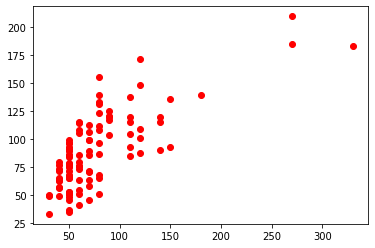

In [53]:
#plt.plot((regress_df_LR["Правильно"]),regress_df_LR["Предсказанно"], 'ro')   
plt.plot((regress_df_LR["Правильно"][0:100]),regress_df_LR["Предсказанно"][0:100], 'ro')   
plt.show()

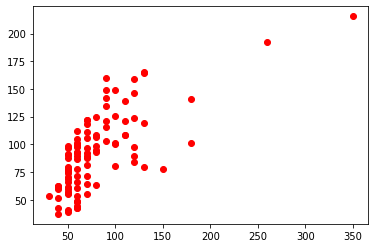

In [56]:
plt.plot((regress_df_lasso["Правильно"][100:200]),regress_df_lasso["Предсказанно"][100:200], 'ro')   
plt.show()